In [1]:
#!/usr/bin/env python3
#pip install  rioxarray==0.3.1
import pandas as pd
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import matplotlib.colors
scriptsdir = os.getcwd()
from scipy.interpolate import griddata
from functools import reduce
import itertools
import argparse


/scratch/local/1845339/ipykernel_49543/2254304007.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(taxas)


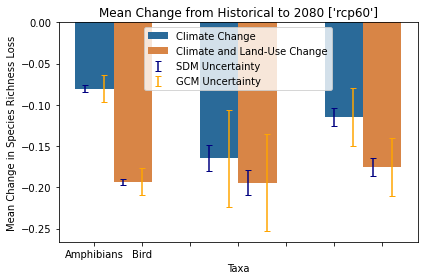

65
['rcp60']
mean_values {'Mammals': [-0.09676302897587863, -0.06380773160899833], 'Amphibians': [-0.22345994074604797, -0.10568276426544004], 'Bird': [-0.14960322613183136, -0.0799499943715789]}
mean_sum_bin_change_taxa {'Mammals': [-0.19228454076538948, -0.1942636951490076], 'Amphibians': [-0.236649286825963, -0.15244432548615064], 'Bird': [-0.19442838937358972, -0.1568057259000343]}
uncertainties_sdm_taxa {'Mammals': [0.0023796177564658033, 0.0052654799487650075], 'Amphibians': [0.01742439770463569, 0.013169092395885037], 'Bird': [0.01478147030436571, 0.007741075790111533]}
uncertainties_gcm_taxa {'Mammals': [0.016475950378704925, 0.015708973628056552, 0.013744201868635827, 0.019981468858363275], 'Amphibians': [0.060625045015644155, 0.05592945934463935, 0.06604323336040244, 0.05295661524052992], 'Bird': [0.02806749445949916, 0.03446214197533961, 0.043715432983830224, 0.03306139410183596]}


<Figure size 432x288 with 0 Axes>

In [37]:
#loss absolute
import pickle
import matplotlib.pyplot as plt
import numpy as np
time=['65'] 
scenario=['rcp60']
# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

with open(os.path.join(output_dir, f"mean_newvalue_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_land_use_change_{scenario}_{time}.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_values_{scenario}_{time}.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_taxa_{scenario}_{time}.pkl"), "rb") as f:
    mean_sum_bin_change_taxa = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_sdm_taxa_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_sdm_taxa = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_gcm_taxa_{scenario}_{time}.pkl"), "rb") as f:
    uncertainties_gcm_taxa = pickle.load(f)
# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time=65 

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

#ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
#ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
#ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}.png")

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')


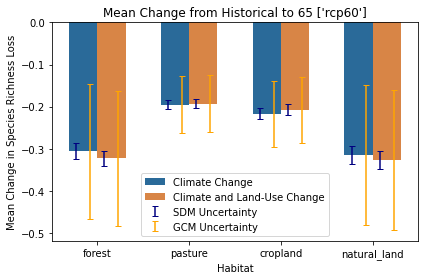

In [36]:
#per habitat instead 
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"
time = ['65']
scenario = ['rcp60']

with open(os.path.join(output_dir, f"mean_newvalue_change_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_land_use_change_habitat{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, f"mean_values_habitat{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, f"mean_sum_bin_change_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    mean_sum_bin_change_habitat = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_sdm_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    uncertainties_sdm_habitat = pickle.load(f)

with open(os.path.join(output_dir, f"uncertainties_gcm_habitat_{scenario}_{time}_gain.pkl"), "rb") as f:
    uncertainties_gcm_habitat = pickle.load(f)

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
habitats = ["forest", "pasture", "cropland", "natural_land"]
time = 65

fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(habitats)) * (2 * bar_width + 0.5)

for i, habitat in enumerate(habitats):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[habitat]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_habitat[habitat]), width=bar_width, alpha=1,
               color=color_land_use_change, label='Climate and Land-Use Change')
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift, np.mean(mean_values[habitat]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_habitat[habitat]), width=bar_width, alpha=1,
               color=color_land_use_change)
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_sdm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_habitat[habitat]),
                    yerr=np.mean(uncertainties_gcm_habitat[habitat]), fmt='none', capsize=3,
                    color=color_gcm_uncertainty)

ax.set_xticks(x_positions + bar_width * 0.5)
ax.set_xticklabels(habitats)

ax.set_xlabel('Habitat')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {time} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()


In [31]:
forest = mean_newvalue_change['GAM']['MIROC5']['forest'].mean()

In [34]:
pasture

<xarray.DataArray 'newvalue' ()>
array(-0.19582133)
Coordinates:
    time     float64 1.146e+03

In [32]:
forest

<xarray.DataArray 'newvalue' ()>
array(-0.19582133)
Coordinates:
    time     float64 1.146e+03

In [33]:
pasture = mean_newvalue_change['GAM']['MIROC5']['pasture'].mean()

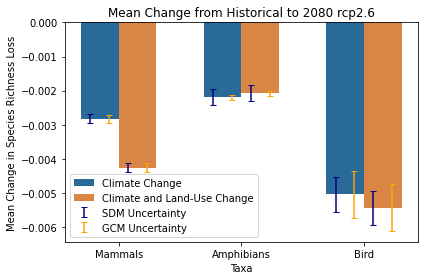

65
rcp2.6
mean_values {'Mammals': [-11.494220933481614, -10.78600636134213], 'Amphibians': [-6.133829945936919, -5.734342583096106], 'Bird': [-41.609105409980074, -31.6028817071718]}
mean_sum_bin_change_taxa {'Mammals': [-14.777618933424199, -18.77700970925739], 'Amphibians': [-5.253644980864326, -5.969563179012427], 'Bird': [-38.4570394351051, -40.51198198625255]}
uncertainties_sdm_taxa {'Mammals': [0.30555666286617095, 0.7120500619645189], 'Amphibians': [0.6597504825860449, 0.6417103721088488], 'Bird': [4.523329547313226, 2.8047064645334605]}
uncertainties_gcm_taxa {'Mammals': [0.3838094116666424, 0.4625881262200604, 0.24919083153391774, 0.819222437926185], 'Amphibians': [0.19891797961781865, 0.09499546754161248, 0.4497057618520137, 0.05535551667018179], 'Bird': [3.854720260070412, 4.389584684972485, 7.01560235108516, 4.752540109488509]}


<Figure size 432x288 with 0 Axes>

In [13]:
num_species = {
    "Mammals": 3941,
    "Amphibians": 2705,
    "Bird": 7262
}

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time = 65 
scenario = "rcp2.6"
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    num_species_taxa = num_species[taxa]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]) / num_species_taxa, width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]) / num_species_taxa, width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_sdm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_gcm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_sdm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_gcm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]) / num_species_taxa, width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]) / num_species_taxa, width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_sdm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_gcm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_sdm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]) / num_species_taxa, yerr= np.mean(uncertainties_gcm_taxa[taxa]) / num_species_taxa, fmt='none', capsize=3, color=color_gcm_uncertainty)
        


ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}_loss_scaled.png")

# Save the plot to the specified filename

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')



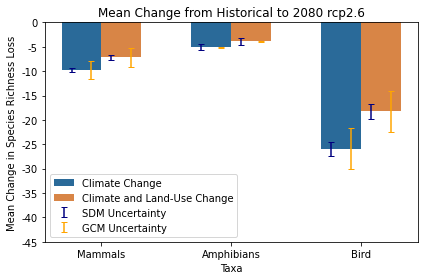

65
rcp2.6
mean_values {'Mammals': [-11.65073549964118, -7.817150876424373], 'Amphibians': [-5.173925252288795, -4.947959775793345], 'Bird': [-30.143587679528128, -21.70941161047007]}
mean_sum_bin_change_taxa {'Mammals': [-7.5016654778255845, -6.841806562986859], 'Amphibians': [-3.841158552799506, -3.9560869543352286], 'Bird': [-19.813512856061838, -16.697237094098462]}
uncertainties_sdm_taxa {'Mammals': [0.45644957214778764, 0.4425378972935083], 'Amphibians': [0.7424971679989129, 0.646872103381155], 'Bird': [1.2907299287039826, 1.627008738660726]}
uncertainties_gcm_taxa {'Mammals': [2.0100693132724805, 1.8932076195777587, 1.7745926403653378, 1.9892996732180328], 'Amphibians': [0.1618962065286378, 0.25550101284751214, 0.019219570572037714, 0.015314163042711826], 'Bird': [4.001401703206238, 4.041253402748703, 4.10264389237078, 4.723053139790398]}


<Figure size 432x288 with 0 Axes>

In [38]:
#loss absolute
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Load pickled data
output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"

with open(os.path.join(output_dir, "mean_newvalue_change.pkl"), "rb") as f:
    mean_newvalue_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_sum_bin_change.pkl"), "rb") as f:
    mean_sum_bin_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_land_use_change.pkl"), "rb") as f:
    mean_land_use_change = pickle.load(f)

with open(os.path.join(output_dir, "mean_values.pkl"), "rb") as f:
    mean_values = pickle.load(f)

with open(os.path.join(output_dir, "mean_sum_bin_change_taxa.pkl"), "rb") as f:
    mean_sum_bin_change_taxa = pickle.load(f)

with open(os.path.join(output_dir, "uncertainties_sdm_taxa.pkl"), "rb") as f:
    uncertainties_sdm_taxa = pickle.load(f)

with open(os.path.join(output_dir, "uncertainties_gcm_taxa.pkl"), "rb") as f:
    uncertainties_gcm_taxa = pickle.load(f)

# Set up the bar plot
sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
time=65 
scenario="rcp2.6"
fig, ax = plt.subplots()

color_change = "#2a6a99"
color_land_use_change = "#d88546"
color_sdm_uncertainty = "navy"
color_gcm_uncertainty = "orange"

bar_width = 0.4
error_bar_shift = 0.1

x_positions = np.arange(len(taxas)) * (2 * bar_width + 0.5)

for i, taxa in enumerate(taxas):
    x_shift = x_positions[i]

    if not i:
        ax.bar(x_shift, np.mean(mean_values[taxa]), width=bar_width, color=color_change, label='Climate Change')
        ax.bar(x_shift + bar_width,  np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change, label='Climate and Land-Use Change')    
        ax.errorbar(x_shift - error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty, label='SDM Uncertainty')
        ax.errorbar(x_shift + error_bar_shift, np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty, label='GCM Uncertainty')
        ax.errorbar(x_shift + bar_width - error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
    else:
        ax.bar(x_shift,  np.mean(mean_values[taxa]), width=bar_width, color=color_change)
        ax.bar(x_shift + bar_width, np.mean(mean_sum_bin_change_taxa[taxa]), width=bar_width, alpha=1, color=color_land_use_change)  
        ax.errorbar(x_shift - error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + error_bar_shift,np.mean(mean_values[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)
        ax.errorbar(x_shift + bar_width - error_bar_shift,np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_sdm_taxa[taxa]), fmt='none', capsize=3, color=color_sdm_uncertainty)
        ax.errorbar(x_shift + bar_width + error_bar_shift, np.mean(mean_sum_bin_change_taxa[taxa]), yerr= np.mean(uncertainties_gcm_taxa[taxa]), fmt='none', capsize=3, color=color_gcm_uncertainty)

ax.set_yticks([-45, -40, -35, -30, -25, -20, -15, -10, -5, 0])
ax.set_yticklabels(['-45', '-40', '-35', '-30', '-25', '-20', '-15', '-10', '-5', '0'])
ax.set_xticks(x_positions + bar_width*0.5)
ax.set_xticklabels(taxas)

year_indices = {1146: '1995', 35: '2050', 65: '2080', 85: '2100'}

ax.set_xlabel('Taxa')
ax.set_ylabel('Mean Change in Species Richness Loss')
ax.set_title(f'Mean Change from Historical to {year_indices[time]} {scenario}')

ax.legend()
plt.tight_layout()
plt.show()

# Save the plot to the specified filename
plt.savefig(f"/storage/homefs/ch21o450/scripts/BioScenComb/main_figures/Fig_4_{year_indices[time]}{scenario}.png")

print(time)
print(scenario)
print(f'mean_values {mean_values}')
print(f'mean_sum_bin_change_taxa {mean_sum_bin_change_taxa}')
print(f'uncertainties_sdm_taxa {uncertainties_sdm_taxa}')
print(f'uncertainties_gcm_taxa {uncertainties_gcm_taxa}')


In [7]:
#loss absolute

sdms = ["GAM", "GBM"]
gcms = ['GFDL-ESM2M', 'IPSL-CM5A-LR', 'HadGEM2-ES', 'MIROC5']
taxas = ["Mammals", "Amphibians", "Bird"]
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
for taxa in taxas:
    for sdm in sdms:
        for gcm in gcms:

            # Load pickled data
            output_dir = "/storage/scratch/users/ch21o450/data/intermediate_results/"
            # Write to pickle files
            with open(os.path.join(output_dir, f"newvalue_hist_sum_{sdm}_{gcm}_{taxa}.pkl"), "rb") as f:
                newvalue_hist_sum_taxa = pickle.load(f) 

            with open(os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}.pkl"), "rb") as f:
                newvalue_future_sum_taxa = pickle.load(f) 

            with open(os.path.join(output_dir, f"newvalue_future_sum_{sdm}_{gcm}_{taxa}.pkl"), "rb") as f:
                sum_bin_hist_sum_taxa = pickle.load(f) 

            with open(os.path.join(output_dir, f"sum_bin_future_sum_{sdm}_{gcm}_{taxa}.pkl"), "rb") as f:
                sum_bin_future_sum_taxa = pickle.load(f) 
    
    

In [10]:
t = newvalue_future_sum_taxa - newvalue_hist_sum_taxa 

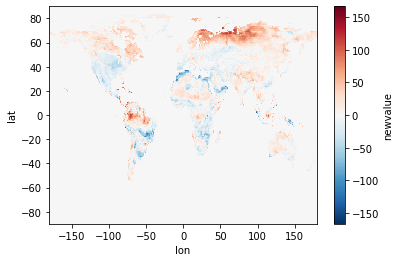

In [11]:
t.plot()